In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

In [2]:
# The first set of models will be made using all the variables, unscaled.
# The second st will replace unscaled with scaled variables.
# After that, we'll reduce the number of variables to only those which were important
X_train = df.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure_nml', 'monthly_charges_nml', 'total_charges_nml'])
X_train_scaled = df.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure', 'tenure_months', 'monthly_charges', 'total_charges'])
X_valid = valid.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure_nml', 'monthly_charges_nml', 'total_charges_nml'])
X_valid_scaled = valid.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure', 'tenure_months', 'monthly_charges', 'total_charges'])

y_train = df[['churn']]
y_valid = valid[['churn']]

# Logistic Regression Model

In [3]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred_LR = logit.predict(X_train)

In [4]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_LR), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,910,107
churn,175,217


In [5]:
print(classification_report(y_train, y_pred_LR))

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1017
         Yes       0.67      0.55      0.61       392

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.79      0.80      0.79      1409



In [6]:
# Is it overfit?  --> Nope
y_pred_LRv = logit.predict(X_valid)

print(classification_report(y_valid, y_pred_LRv))

              precision    recall  f1-score   support

          No       0.85      0.88      0.86       837
         Yes       0.61      0.56      0.59       290

    accuracy                           0.80      1127
   macro avg       0.73      0.72      0.72      1127
weighted avg       0.79      0.80      0.79      1127



## Logistic Regression Scaled

In [7]:
logit_s = LogisticRegression().fit(X_train_scaled, y_train)
y_pred_LRs = logit_s.predict(X_train_scaled)

In [8]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_LRs), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,911,106
churn,176,216


In [9]:
print(classification_report(y_train, y_pred_LRs))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1017
         Yes       0.67      0.55      0.61       392

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.79      0.80      0.79      1409



In [10]:
# Is it overfit? --> Nope
y_pred_LRvs = logit_s.predict(X_valid_scaled)

print(classification_report(y_valid, y_pred_LRvs))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       837
         Yes       0.63      0.53      0.58       290

    accuracy                           0.80      1127
   macro avg       0.74      0.71      0.72      1127
weighted avg       0.79      0.80      0.79      1127



# Decision Tree Model

In [11]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123).fit(X_train, y_train)
y_pred_DT = clf.predict(X_train)

In [12]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_DT), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,935,82
churn,196,196


In [13]:
print(classification_report(y_train, y_pred_DT))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1017
         Yes       0.71      0.50      0.59       392

    accuracy                           0.80      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [14]:
# Is it overfit? --> Tiny bit
y_pred_DTv = clf.predict(X_valid)

print(classification_report(y_valid, y_pred_DTv))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86       837
         Yes       0.60      0.41      0.49       290

    accuracy                           0.78      1127
   macro avg       0.71      0.66      0.67      1127
weighted avg       0.76      0.78      0.76      1127



## Decision Tree Scaled

In [15]:
clf_s = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123).fit(X_train_scaled, y_train)
y_pred_DTs = clf_s.predict(X_train_scaled)

In [16]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_DTs), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,935,82
churn,196,196


In [17]:
print(classification_report(y_train, y_pred_DTs))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1017
         Yes       0.71      0.50      0.59       392

    accuracy                           0.80      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [18]:
# Is it overfit? --> Tiny bit
y_pred_DTvs = clf_s.predict(X_valid_scaled)

print(classification_report(y_valid, y_pred_DTvs))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86       837
         Yes       0.61      0.42      0.50       290

    accuracy                           0.78      1127
   macro avg       0.71      0.66      0.68      1127
weighted avg       0.77      0.78      0.77      1127



# Random Forest Model

In [19]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=3, n_estimators=100, max_depth=20, random_state=123)

rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_train)

In [20]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_RF), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,986,31
churn,89,303


In [21]:
print(classification_report(y_train, y_pred_RF))

              precision    recall  f1-score   support

          No       0.92      0.97      0.94      1017
         Yes       0.91      0.77      0.83       392

    accuracy                           0.91      1409
   macro avg       0.91      0.87      0.89      1409
weighted avg       0.91      0.91      0.91      1409



In [22]:
# Is it overfit? --> Yes but the performance is similar to Logistic Regression and Decision Tree models
y_pred_RFv = rf.predict(X_valid)

print(classification_report(y_valid, y_pred_RFv))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87       837
         Yes       0.62      0.49      0.55       290

    accuracy                           0.79      1127
   macro avg       0.73      0.70      0.71      1127
weighted avg       0.78      0.79      0.78      1127



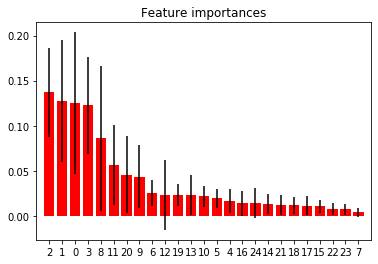

In [23]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [24]:
list(zip(X_train.columns, rf.feature_importances_))

[('tenure', 0.12523317123885136),
 ('tenure_months', 0.12724794357976818),
 ('monthly_charges', 0.13684756644638102),
 ('total_charges', 0.12255933208926098),
 ('senior_citizen', 0.01631292336565892),
 ('gender_enc', 0.01947024013951564),
 ('family_support', 0.025235360267211314),
 ('phone_service_enc', 0.003911510741659242),
 ('contract_type_id', 0.08580553006960778),
 ('internet_service_type_id', 0.04334673685155206),
 ('extra_lines', 0.021452324976089815),
 ('internet_services', 0.05641885785490656),
 ('has_internet', 0.023353309727083965),
 ('online_security_enc', 0.022964361932268765),
 ('online_backup_enc', 0.013405397607476253),
 ('device_protection_enc', 0.010360999133283876),
 ('tech_support_enc', 0.01412221055507785),
 ('streaming_tv_enc', 0.011443206961726122),
 ('streaming_movies_enc', 0.011540248243728594),
 ('paperless_billing_enc', 0.02300344717960696),
 ('pay_elec_check', 0.04573695382804372),
 ('pay_mail', 0.011960596860633069),
 ('pay_bank', 0.007355225592204001),
 ('

In [25]:
rf_s = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=3, n_estimators=100, max_depth=20, random_state=123)

rf_s.fit(X_train_scaled, y_train)
y_pred_RFs = rf_s.predict(X_train_scaled)

In [26]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_RFs), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,987,30
churn,103,289


In [27]:
print(classification_report(y_train, y_pred_RFs))

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      1017
         Yes       0.91      0.74      0.81       392

    accuracy                           0.91      1409
   macro avg       0.91      0.85      0.87      1409
weighted avg       0.91      0.91      0.90      1409



In [28]:
# Is it overfit? --> Yes but the performance is similar to Logistic Regression and Decision Tree models
y_pred_RFvs = rf_s.predict(X_valid_scaled)

print(classification_report(y_valid, y_pred_RFvs))

              precision    recall  f1-score   support

          No       0.83      0.90      0.87       837
         Yes       0.63      0.48      0.55       290

    accuracy                           0.79      1127
   macro avg       0.73      0.69      0.71      1127
weighted avg       0.78      0.79      0.78      1127



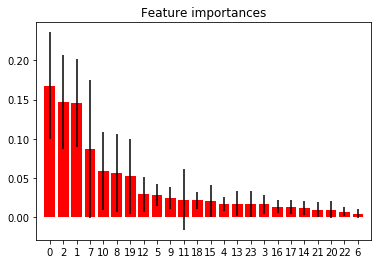

In [29]:
importances = rf_s.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_s.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [30]:
list(zip(X_train_scaled.columns, rf_s.feature_importances_))

[('tenure_nml', 0.16790945523839715),
 ('monthly_charges_nml', 0.14523781712238792),
 ('total_charges_nml', 0.1474434300006752),
 ('senior_citizen', 0.016442005261290374),
 ('gender_enc', 0.017452526960359413),
 ('family_support', 0.02794153970466573),
 ('phone_service_enc', 0.0045274227799558895),
 ('contract_type_id', 0.08726111041338232),
 ('internet_service_type_id', 0.05663170091975243),
 ('extra_lines', 0.024411871652860545),
 ('internet_services', 0.059068000019530824),
 ('has_internet', 0.022541366334256647),
 ('online_security_enc', 0.029319819333551645),
 ('online_backup_enc', 0.017300221153528708),
 ('device_protection_enc', 0.011789131118396913),
 ('tech_support_enc', 0.02042813390345716),
 ('streaming_tv_enc', 0.013554855071474222),
 ('streaming_movies_enc', 0.012723776322067538),
 ('paperless_billing_enc', 0.02154807671174964),
 ('pay_elec_check', 0.05239276181518172),
 ('pay_mail', 0.009926470945997084),
 ('pay_bank', 0.009977518627858796),
 ('pay_cc', 0.0073802475852438

## KNN Model

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_train, y_train)

y_pred_knn = knn.predict(X_train)

In [32]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_knn), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,939,78
churn,171,221


In [33]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

          No       0.85      0.92      0.88      1017
         Yes       0.74      0.56      0.64       392

    accuracy                           0.82      1409
   macro avg       0.79      0.74      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [34]:
# Is it overfit? --> Yes
y_pred_knnv = knn.predict(X_valid)

print(classification_report(y_valid, y_pred_knnv))

              precision    recall  f1-score   support

          No       0.81      0.88      0.84       837
         Yes       0.53      0.40      0.45       290

    accuracy                           0.75      1127
   macro avg       0.67      0.64      0.65      1127
weighted avg       0.74      0.75      0.74      1127



### KNN Model Scaled

In [35]:
knn_s = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_train_scaled, y_train)

y_pred_knns = knn_s.predict(X_train_scaled)

In [36]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_knns), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,928,89
churn,141,251


In [37]:
print(classification_report(y_train, y_pred_knns))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89      1017
         Yes       0.74      0.64      0.69       392

    accuracy                           0.84      1409
   macro avg       0.80      0.78      0.79      1409
weighted avg       0.83      0.84      0.83      1409



In [40]:
# Is it overfit? --> Yes
y_pred_knnvs = knn_s.predict(X_valid_scaled)

print(classification_report(y_valid, y_pred_knnvs))

              precision    recall  f1-score   support

          No       0.84      0.84      0.84       837
         Yes       0.54      0.53      0.54       290

    accuracy                           0.76      1127
   macro avg       0.69      0.69      0.69      1127
weighted avg       0.76      0.76      0.76      1127



In [ ]:
# After al this, I like the Random Forest model best

## Decide which features to use